In [1]:
import mat73
import pandas as pd
import numpy as np
import scipy.io
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

### Data loading and preprocessing

In [2]:
import os

DATA_DIR = ''
if 'google.colab' not in str(get_ipython()) and "anuja" in os.environ.get('USER'):
    DATA_DIR = 'data/'
    

In [3]:
foof = pd.read_csv(DATA_DIR+"foof2features.csv")
foof = foof.rename(columns={"C1": "IDs" ,"C2": "Intercept", "C3": "Slope"})
foof

,IDs,Intercept,Slope
0,NDARAA075AMK,0.986272,1.825774
1,NDARAA112DMH,1.486650,1.888544
2,NDARAA117NEJ,1.593155,2.095749
3,NDARAA947ZG5,0.703331,1.724831
4,NDARAA948VFH,0.918020,1.749441
...,...,...,...
2037,NDARZN277NR6,1.351549,1.996940
2038,NDARZN578YDP,1.380795,2.036327
2039,NDARZN610GTY,0.339229,1.050644
2040,NDARZN677EYE,0.781225,1.470061


In [4]:
data = mat73.loadmat(DATA_DIR+'x_source.mat')  
df2 = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))

# sparsing
df2 = np.array(df2).reshape(data['x'].shape) 
df2_sparsed = np.concatenate([np.expand_dims(df2[:,:,i:i+10].mean(axis = 2), axis = 2) for i in range(0, data['x'].shape[2]-10, 10)], axis = 2)
df2 = pd.DataFrame(df2_sparsed.reshape((df2_sparsed.shape[0], -1)))

#scaling
norm = MinMaxScaler().fit(df2)
df2 = norm.transform(df2)
df2 = pd.DataFrame(df2.reshape((df2.shape[0], -1)))

df2['IDs'] = foof['IDs']
df2

,0,1,2,3,4,5,6,7,8,9,...,2643,2644,2645,2646,2647,2648,2649,2650,2651,IDs
0,3.497571e-01,4.585819e-01,2.938905e-01,3.770603e-01,0.327764,0.552059,0.462017,0.695207,0.642190,0.584085,...,0.337358,0.439658,0.437051,0.364673,0.405482,0.326733,0.428504,0.250803,0.179322,NDARAA075AMK
1,7.464767e-01,9.048637e-01,5.054438e-01,7.021925e-01,0.498947,0.342338,0.283478,0.221679,0.178758,0.178338,...,0.430404,0.296341,0.321952,0.131375,0.579138,0.478879,0.304577,0.360859,0.448476,NDARAA112DMH
2,2.204578e-01,3.562272e-01,3.895027e-01,4.181956e-01,0.495129,0.436858,0.392300,0.446757,0.528172,0.409405,...,0.404292,0.339923,0.505282,0.340129,0.203517,0.174711,0.341549,0.693619,0.545169,NDARAA117NEJ
3,6.346560e-02,1.204557e-01,1.650503e-01,7.631559e-01,0.523793,0.399243,0.267432,0.301397,0.283535,0.363612,...,0.108138,0.049740,0.033945,0.304668,0.111156,0.008791,0.005297,0.266759,0.339304,NDARAA947ZG5
4,2.758219e-01,2.255777e-01,4.828928e-01,4.704279e-01,0.330692,0.310594,0.284202,0.298111,0.245370,0.250187,...,0.164094,0.161737,0.123381,0.079693,0.069366,0.043857,0.029212,0.021894,0.013197,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,3.394601e-01,4.781692e-01,5.423877e-01,4.137127e-01,0.379793,0.413474,0.538537,0.457002,0.286496,0.222562,...,0.268739,0.328251,0.327389,0.292491,0.367808,0.346005,0.348895,0.399141,0.367943,NDARZN148PMN
2037,1.072605e-01,2.045245e-01,2.610531e-01,3.236518e-01,0.437417,0.432447,0.412152,0.445771,0.374603,0.386189,...,0.451919,0.240030,0.125819,0.083812,0.289439,0.378008,0.264043,0.502426,0.008403,NDARZN277NR6
2038,2.801818e-01,3.838379e-01,3.575040e-01,3.295642e-01,0.339077,0.263007,0.204378,0.308062,0.413562,0.319891,...,0.386920,0.543971,0.590438,0.544979,0.679570,0.616411,0.589517,0.634712,0.549726,NDARZN578YDP
2039,3.260273e-15,3.373362e-14,2.304057e-13,1.498324e-12,0.000009,0.142998,0.689837,0.800874,0.499946,0.248208,...,0.213887,0.230102,0.189709,0.132429,0.124579,0.085125,0.061278,0.049636,0.032335,NDARZN610GTY


In [5]:
beh = pd.read_csv(DATA_DIR+"behaviorals.csv")
print('Before:'+str(beh.shape))

most_common_disorders = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders',  'No Diagnosis Given', 'Other Disorders']

category_columns = ['DX_' + str(i).zfill(2) + '_Cat' for i in range(1, 11)] +\
                   ['DX_' + str(i).zfill(2) + '_Sub' for i in range(1, 11)]

# removing patients with incomplete eval
initial_size = beh.shape[0]
beh = beh[beh.DX_01 != 'No Diagnosis Given: Incomplete Eval']
beh = beh.reset_index(drop=True)
new_size = beh.shape[0]

print('After:'+str(beh.shape))
print('Removing', initial_size - new_size,
      'patients as their evaluations was incomplete.')

Before:(3076, 177)
After:(2939, 177)
Removing 137 patients as their evaluations was incomplete.


In [6]:
no_diagnosis_given = 'No Diagnosis Given'

diagnoses_to_ids = {disorder: i for i, disorder in enumerate(most_common_disorders)}
diagnoses_to_ids

{'Attention-Deficit/Hyperactivity Disorder': 0,
 'Anxiety Disorders': 1,
 'Specific Learning Disorder': 2,
 'Autism Spectrum Disorder': 3,
 'Disruptive': 4,
 'Communication Disorder': 5,
 'Depressive Disorders': 6,
 'No Diagnosis Given': 7,
 'Other Disorders': 8}

In [7]:
def get_disorder(data, row, index):
    disorder = data.iloc[row][category_columns[index]]

    if disorder == 'Neurodevelopmental Disorders':
        disorder = data.iloc[row][category_columns[index + 10]]

    return disorder

order_of_disorders = []
for k in range(beh.shape[0]):
    i = 0
    disorder = get_disorder(beh, k, i)
    disorders_patient = []
    while not pd.isnull(disorder):
        if disorder in diagnoses_to_ids:
            if diagnoses_to_ids[disorder] not in disorders_patient:
                disorders_patient.append(diagnoses_to_ids[disorder])
        else:
            if diagnoses_to_ids['Other Disorders'] not in disorders_patient:
                disorders_patient.append(diagnoses_to_ids['Other Disorders'])
        i += 1
        if i == len(category_columns):
            break
        disorder = get_disorder(beh, k, i)

        
    order_of_disorders.append(disorders_patient)

In [8]:
other_disorders = []
no_diagnosis_given = []
for i in order_of_disorders:
    if 7 in i:
        no_diagnosis_given.append(1)
        i.remove(7)
    else:
        no_diagnosis_given.append(0)
    if 8 in i:
        other_disorders.append(1)
        i.remove(8)
    else:
        other_disorders.append(0)

In [9]:
max_len_order = np.max([len(x) for x in order_of_disorders])

# pad with a new token denoting the pad token
pad_token = len(most_common_disorders)
bod_token = len(most_common_disorders) + 1
eod_token = len(most_common_disorders) + 2

order_of_disorders = [[bod_token] + x + [eod_token] + [pad_token] * (max_len_order - len(x)) for x in order_of_disorders]

order_of_disorders = np.array(order_of_disorders)

classes = np.zeros((len(most_common_disorders),
                    beh.shape[0]), dtype=np.int32)

df_disorders = beh[category_columns]

for i, disorder in enumerate(most_common_disorders):
    mask = df_disorders.select_dtypes(include=[object]). \
        applymap(lambda x: disorder in x if pd.notnull(x) else False)

    disorder_df = df_disorders[mask.any(axis=1)]

    np.add.at(classes[i], disorder_df.index.values, 1)

behaviour_data_columns = beh.columns.values.astype(np.str)

columns_to_drop = behaviour_data_columns[
    np.flatnonzero(np.core.defchararray.find(behaviour_data_columns, 'DX') != -1)]

behaviour_data = beh.drop(columns=columns_to_drop)

for disorder, classification in zip(most_common_disorders, classes):
    behaviour_data[disorder] = classification

behaviour_data['order_diagnoses'] = list(order_of_disorders)

In [10]:
common_disorders = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders']

labels=behaviour_data[["IDs"]+list(common_disorders)]
labels["Other Disorders"] = other_disorders
labels

/tmp/ipykernel_1015641/226828375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Other Disorders"] = other_disorders


,IDs,Attention-Deficit/Hyperactivity Disorder,Anxiety Disorders,Specific Learning Disorder,Autism Spectrum Disorder,Disruptive,Communication Disorder,Depressive Disorders,Other Disorders
0,NDARAA075AMK,0,0,0,0,0,0,0,0
1,NDARAA112DMH,1,0,0,0,1,0,0,1
2,NDARAA117NEJ,1,0,0,0,1,0,0,1
3,NDARAA306NT2,1,1,1,0,0,1,0,1
4,NDARAA504CRN,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2934,NDARZZ007YMP,0,0,0,1,0,0,0,1
2935,NDARZZ740MLM,1,0,0,0,0,0,0,0
2936,NDARZZ810LVF,0,0,0,1,0,1,0,1
2937,NDARZZ830JM7,0,0,0,1,0,0,0,1


In [11]:
df = pd.merge(df2, foof, on='IDs', how='inner')
df = pd.merge(df2, labels, on='IDs', how='inner')
df

,0,1,2,3,4,5,6,7,8,9,...,2651,IDs,Attention-Deficit/Hyperactivity Disorder,Anxiety Disorders,Specific Learning Disorder,Autism Spectrum Disorder,Disruptive,Communication Disorder,Depressive Disorders,Other Disorders
0,3.497571e-01,4.585819e-01,2.938905e-01,3.770603e-01,0.327764,0.552059,0.462017,0.695207,0.642190,0.584085,...,0.179322,NDARAA075AMK,0,0,0,0,0,0,0,0
1,7.464767e-01,9.048637e-01,5.054438e-01,7.021925e-01,0.498947,0.342338,0.283478,0.221679,0.178758,0.178338,...,0.448476,NDARAA112DMH,1,0,0,0,1,0,0,1
2,2.204578e-01,3.562272e-01,3.895027e-01,4.181956e-01,0.495129,0.436858,0.392300,0.446757,0.528172,0.409405,...,0.545169,NDARAA117NEJ,1,0,0,0,1,0,0,1
3,6.346560e-02,1.204557e-01,1.650503e-01,7.631559e-01,0.523793,0.399243,0.267432,0.301397,0.283535,0.363612,...,0.339304,NDARAA947ZG5,1,0,1,1,0,0,0,1
4,2.758219e-01,2.255777e-01,4.828928e-01,4.704279e-01,0.330692,0.310594,0.284202,0.298111,0.245370,0.250187,...,0.013197,NDARAA948VFH,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.199443e-01,3.397615e-01,3.707636e-01,5.212714e-01,0.838115,0.603350,0.675639,0.628488,0.471081,0.321416,...,0.333760,NDARZM903TNL,0,0,0,0,0,0,0,0
1916,3.394601e-01,4.781692e-01,5.423877e-01,4.137127e-01,0.379793,0.413474,0.538537,0.457002,0.286496,0.222562,...,0.367943,NDARZN148PMN,0,1,0,0,0,0,0,0
1917,1.072605e-01,2.045245e-01,2.610531e-01,3.236518e-01,0.437417,0.432447,0.412152,0.445771,0.374603,0.386189,...,0.008403,NDARZN277NR6,1,1,0,0,0,0,1,0
1918,3.260273e-15,3.373362e-14,2.304057e-13,1.498324e-12,0.000009,0.142998,0.689837,0.800874,0.499946,0.248208,...,0.032335,NDARZN610GTY,0,0,0,0,0,0,0,1


### Data Split

In [12]:
disorders_list = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders', 'Other Disorders']
x = df[df.columns.difference(['IDs']+disorders_list)]
y = df[disorders_list]

# summarize dataset shape
print(x.shape, y.shape)

(1920, 2652) (1920, 8)


In [13]:
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size=0.25, shuffle=True)

In [14]:
train_labels = np. array(train_labels) 
test_labels = np. array(test_labels) 

In [15]:
print(train_features.shape, test_features.shape)

(1440, 2652) (480, 2652)


## FEATURE EXTRACTION WITH PCA

In [16]:
#scaling features

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(train_features)

# transform training data
train_features = norm.transform(train_features)
test_features = norm.transform(test_features)

print(train_features.shape, test_features.shape)

(1440, 2652) (480, 2652)


In [17]:
# dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(.95) # 95% variance retained
pca.fit(train_features)

# transform data
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)
print(train_features.shape, test_features.shape)

(1440, 779) (480, 779)


In [18]:
train_labels.sum(axis=0)

array([847, 487, 339, 212, 237, 200, 154, 574])

In [19]:
test_labels.sum(axis=0)

array([318, 152, 100,  79,  60,  72,  40, 182])

## FEATURE EXTRACTION WITH AUTOENCODER

In [20]:
# import tensorflow as tf
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
# from tensorflow.keras.utils import plot_model, to_categorical

# n_inputs = train_features.shape[1]

# visible = Input(shape=(n_inputs,))
# e = Dense(n_inputs*2)(visible)
# e = BatchNormalization()(e)
# e = LeakyReLU()(e)
# e = Dense(n_inputs)(e)
# e = BatchNormalization()(e)
# e = LeakyReLU()(e)
# n_bottleneck = round(float(n_inputs) / 2.0)
# bottleneck = Dense(n_bottleneck)(e)

# d = Dense(n_inputs)(bottleneck)
# d = BatchNormalization()(d)
# d = LeakyReLU()(d)

# d = Dense(n_inputs*2)(d)
# d = BatchNormalization()(d)
# d = LeakyReLU()(d)

# output = Dense(8, activation='linear')(d)

# model = Model(inputs=visible, outputs=output)
# model.compile(optimizer='adam', loss='mse')
# plot_model(model, 'autoencoder_compress.png', show_shapes=True)

# history = model.fit(train_features, train_labels, epochs=50, batch_size=16, verbose=2)
# encoder = Model(inputs=visible, outputs=bottleneck)

# plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# encoder.save('autoencoder.h5')

In [21]:
# # encode the data
# encoder= load_model('autoencoder.h5', compile=False)

# train_features = encoder.predict(train_features)
# test_features = encoder.predict(test_features)

### Metrics

In [22]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

n_classes = train_labels.shape[1]

def plot_pr_curve(Y_test, y_score):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        Y_test.ravel(), y_score.ravel()
    )
    average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

    _, ax = plt.subplots(figsize=(8, 8))

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines, labels = [], []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

    for i in range(n_classes):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i}")

    # add the legend for the iso-f1 curves
    handles, labels = display.ax_.get_legend_handles_labels()
    handles.extend([l])
    labels.extend(["iso-f1 curves"])
    # set the legend and the axes
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Precision-Recall curve")

    plt.show()
    
def plot_roc_curve(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
   
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot ROC curve
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
from sklearn.metrics import hamming_loss, accuracy_score
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

def brier_multi(targets, probs):
    return np.mean(np.sum((probs - targets)**2, axis=1))

def evaluate(y_test, y_pred_prob, brier=True):
    y_pred = y_pred_prob.round()
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    if brier:
        print("Brier Score:", brier_multi(y_test, y_pred_prob))
    print("Classification Report:\n", skm.classification_report(y_test,y_pred, zero_division=1))
    print("Confusion matrix:\n", skm.multilabel_confusion_matrix(y_test, y_pred))

## Models

### Multi Output Classifier

LogisticRegression():
Accuracy: 0.07291666666666667
Hamming Loss: 0.30026041666666664
Brier Score: 1.8169451799506575
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       318
           1       0.30      0.26      0.28       152
           2       0.18      0.13      0.15       100
           3       0.21      0.13      0.16        79
           4       0.08      0.05      0.06        60
           5       0.10      0.06      0.07        72
           6       0.11      0.07      0.09        40
           7       0.37      0.33      0.35       182

   micro avg       0.41      0.34      0.37      1003
   macro avg       0.25      0.21      0.23      1003
weighted avg       0.38      0.34      0.35      1003
 samples avg       0.52      0.43      0.33      1003

Confusion matrix:
 [[[ 62 100]
  [114 204]]

 [[234  94]
  [112  40]]

 [[322  58]
  [ 87  13]]

 [[363  38]
  [ 69  10]]

 [[386  34]
  [ 57   3]]

 [[3

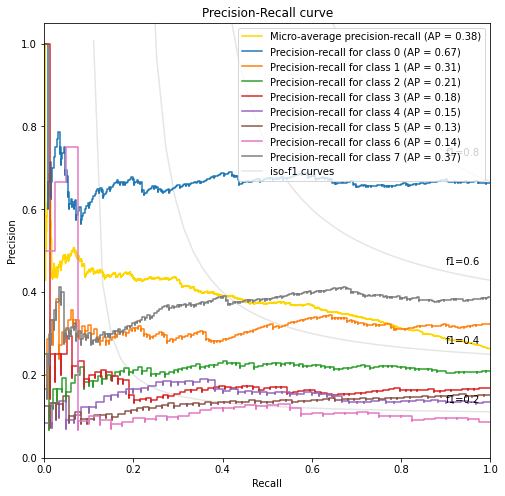

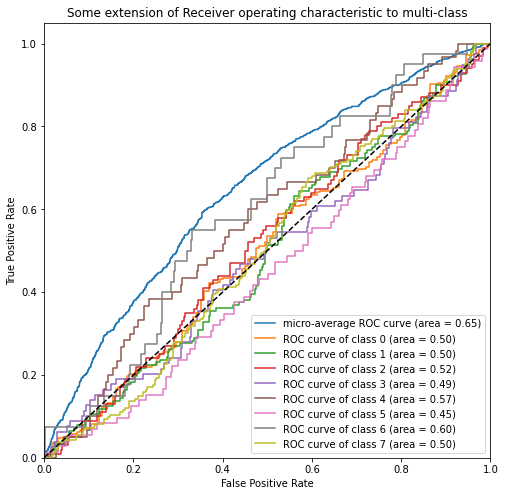

RandomForestClassifier(random_state=1):
Accuracy: 0.15208333333333332
Hamming Loss: 0.221875
Brier Score: 1.3271039583333333
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.98      0.79       318
           1       1.00      0.00      0.00       152
           2       1.00      0.00      0.00       100
           3       1.00      0.00      0.00        79
           4       1.00      0.00      0.00        60
           5       1.00      0.00      0.00        72
           6       1.00      0.00      0.00        40
           7       0.25      0.01      0.01       182

   micro avg       0.66      0.31      0.42      1003
   macro avg       0.86      0.12      0.10      1003
weighted avg       0.76      0.31      0.25      1003
 samples avg       0.67      0.44      0.42      1003

Confusion matrix:
 [[[  4 158]
  [  7 311]]

 [[328   0]
  [152   0]]

 [[380   0]
  [100   0]]

 [[401   0]
  [ 79   0]]

 [[420   0]
  [ 60   0]

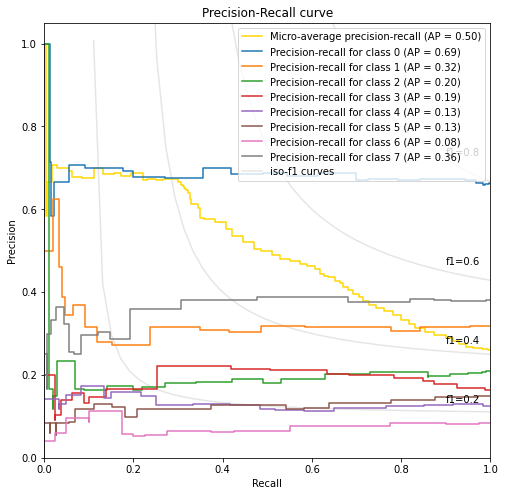

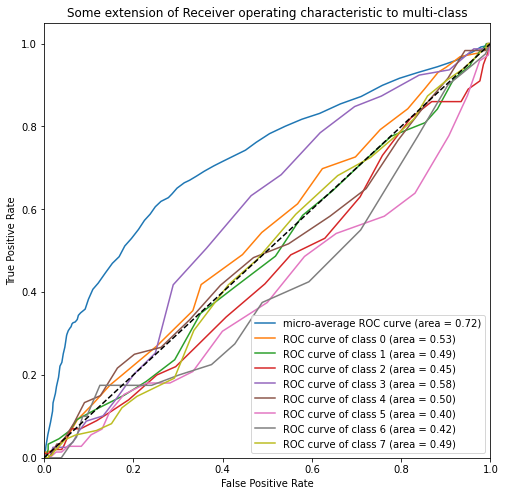

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
forest = RandomForestClassifier(random_state=1)
lg = LogisticRegression()
models = [lg, forest]

for model in models:

    multi_output_model = MultiOutputClassifier(model, n_jobs=-1)
    multi_output_model.fit(train_features, train_labels)
    predicted_labels = np.asarray(multi_output_model.predict_proba(test_features))[:, :, 1].T
    print(str(model)+':')
    evaluate(test_labels, predicted_labels)
    plot_pr_curve(test_labels, predicted_labels)
    plot_roc_curve(test_labels, predicted_labels)

### MLP

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_mlp(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

n_inputs, n_outputs = train_features.shape[1],train_labels.shape[1]
mlp = get_mlp(n_inputs, n_outputs)
mlp.fit(train_features, train_labels, verbose=1, epochs=100)

2021-11-29 16:04:53.010168: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-29 16:04:53.016457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-29 16:04:53.016752: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:06.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-11-29 16:04:53.016919: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-11-29 16:04:53.018095: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-11-29 16:04:53.019395: I tensorflow/stream_executor/platform/default/d

Epoch 1/100
 1/45 [..............................] - ETA: 0s - loss: 0.7075

2021-11-29 16:04:53.732810: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


45/45 [==============================] - 0s 1ms/step - loss: 0.6365
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5262
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4751
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.4377
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3983
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3547
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.3057
Epoch 8/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2564
Epoch 9/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2077
Epoch 10/100
45/45 [==============================] - 0s 1ms/step - loss: 0.1658
Epoch 11/100
45/45 [==============================] - 0s 1ms/step - loss: 0.1286
Epoch 12/100
45/45 [==============================] - 0s 1ms/step - loss: 0.0988
Epoch 13/100
45/45 [=============================

In [26]:
predicted_labels_mlp = mlp.predict(test_features)
evaluate(test_labels, predicted_labels_mlp)

Accuracy: 0.058333333333333334
Hamming Loss: 0.2875
Brier Score: 2.0920440945516523
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       318
           1       0.31      0.28      0.29       152
           2       0.23      0.19      0.21       100
           3       0.15      0.06      0.09        79
           4       0.04      0.02      0.02        60
           5       0.12      0.06      0.08        72
           6       0.29      0.12      0.18        40
           7       0.44      0.43      0.43       182

   micro avg       0.44      0.36      0.39      1003
   macro avg       0.28      0.23      0.24      1003
weighted avg       0.39      0.36      0.37      1003
 samples avg       0.55      0.44      0.35      1003

Confusion matrix:
 [[[ 56 106]
  [114 204]]

 [[231  97]
  [109  43]]

 [[316  64]
  [ 81  19]]

 [[373  28]
  [ 74   5]]

 [[397  23]
  [ 59   1]]

 [[378  30]
  [ 68   4]]

 [[428  12]


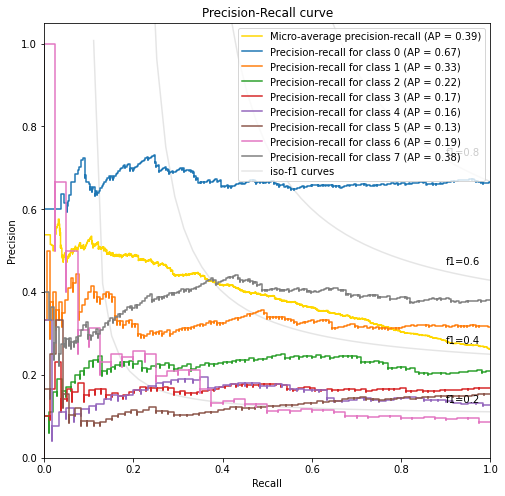

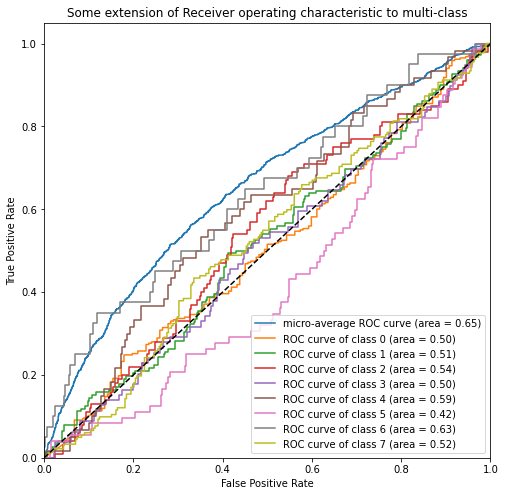

In [27]:
plot_pr_curve(test_labels, predicted_labels_mlp)
plot_roc_curve(test_labels, predicted_labels_mlp)

### Binary Relevance
ignores the possible correlations between class labels

In [28]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())
classifier.fit(test_features, test_labels)

BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [29]:
predicted_labels_br = classifier.predict_proba(test_features)
evaluate(test_labels, predicted_labels_br.toarray())

Accuracy: 0.8541666666666666
Hamming Loss: 0.01953125
Brier Score: 0.11664144636954678
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.96      0.94      0.95       152
           2       0.96      0.97      0.97       100
           3       0.96      0.96      0.96        79
           4       1.00      0.98      0.99        60
           5       0.96      0.99      0.97        72
           6       1.00      0.97      0.99        40
           7       0.91      0.95      0.93       182

   micro avg       0.96      0.96      0.96      1003
   macro avg       0.97      0.97      0.97      1003
weighted avg       0.96      0.96      0.96      1003
 samples avg       0.97      0.97      0.96      1003

Confusion matrix:
 [[[156   6]
  [  9 309]]

 [[322   6]
  [  9 143]]

 [[376   4]
  [  3  97]]

 [[398   3]
  [  3  76]]

 [[420   0]
  [  1  59]]

 [[405   3]
  [  1  71]]

 [[440   

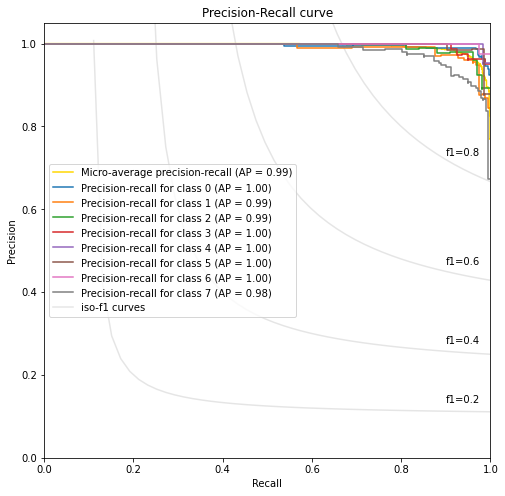

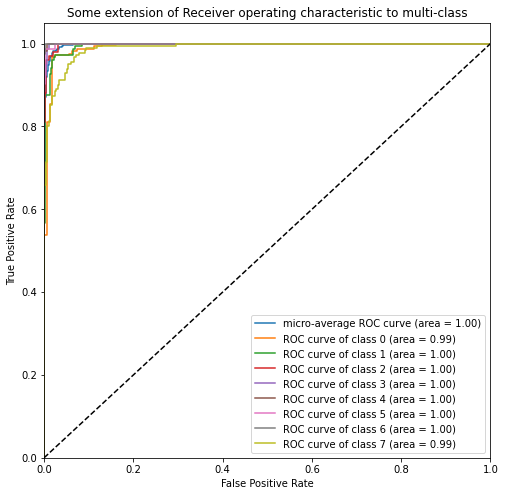

In [30]:
plot_pr_curve(test_labels, predicted_labels_br.toarray())
plot_roc_curve(test_labels, predicted_labels_br.toarray())

### Classfier Chains

In [31]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

classifier = ClassifierChain(LogisticRegression())
classifier.fit(train_features, train_labels)
# we should optimise this a little

ClassifierChain(classifier=LogisticRegression(), require_dense=[True, True])

In [32]:
predicted_labels_cc = classifier.predict_proba(test_features)
evaluate(test_labels, predicted_labels_cc.toarray())

Accuracy: 0.075
Hamming Loss: 0.30390625
Brier Score: 1.8666265456718396
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       318
           1       0.29      0.25      0.27       152
           2       0.17      0.12      0.14       100
           3       0.17      0.10      0.13        79
           4       0.15      0.12      0.13        60
           5       0.12      0.06      0.08        72
           6       0.10      0.07      0.09        40
           7       0.29      0.22      0.25       182

   micro avg       0.40      0.32      0.35      1003
   macro avg       0.25      0.20      0.22      1003
weighted avg       0.36      0.32      0.34      1003
 samples avg       0.53      0.41      0.31      1003

Confusion matrix:
 [[[ 62 100]
  [114 204]]

 [[233  95]
  [114  38]]

 [[323  57]
  [ 88  12]]

 [[363  38]
  [ 71   8]]

 [[381  39]
  [ 53   7]]

 [[380  28]
  [ 68   4]]

 [[413  27]
  [ 37   3]

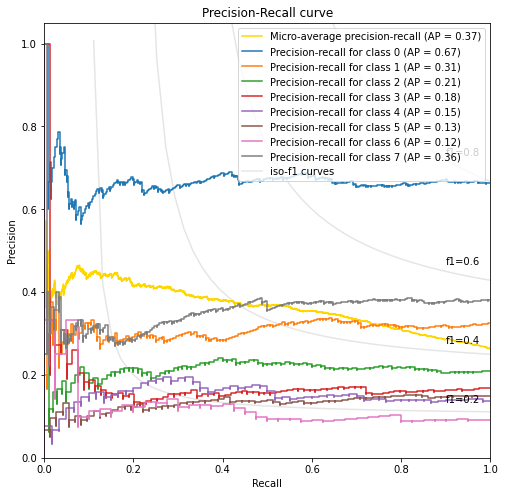

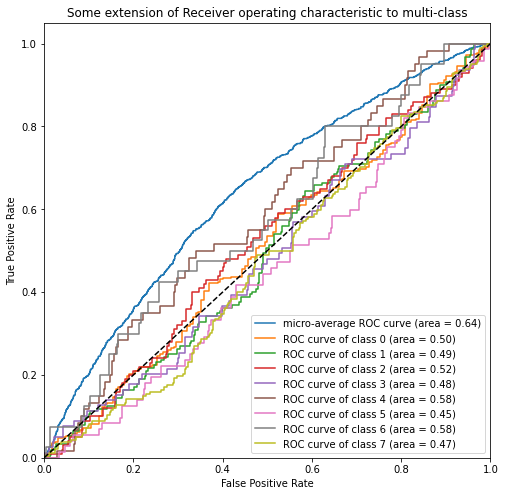

In [33]:
plot_pr_curve(test_labels, predicted_labels_cc.toarray())
plot_roc_curve(test_labels, predicted_labels_cc.toarray())

### Label Powerset
takes correlations into account!

In [34]:
from skmultilearn.problem_transform import LabelPowerset

classifier = LabelPowerset(LogisticRegression())
classifier.fit(train_features, train_labels)

/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LabelPowerset(classifier=LogisticRegression(), require_dense=[True, True])

In [35]:
predicted_labels_lp = classifier.predict_proba(test_features)
evaluate(test_labels, predicted_labels_lp.toarray())

Accuracy: 0.10625
Hamming Loss: 0.24791666666666667
Brier Score: 1.4280884634840472
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.69      0.66       318
           1       0.38      0.10      0.16       152
           2       0.33      0.06      0.10       100
           3       1.00      0.00      0.00        79
           4       0.08      0.02      0.03        60
           5       1.00      0.00      0.00        72
           6       1.00      0.00      0.00        40
           7       0.39      0.18      0.24       182

   micro avg       0.55      0.27      0.36      1003
   macro avg       0.60      0.13      0.15      1003
weighted avg       0.56      0.27      0.29      1003
 samples avg       0.68      0.38      0.34      1003

Confusion matrix:
 [[[ 39 123]
  [100 218]]

 [[303  25]
  [137  15]]

 [[368  12]
  [ 94   6]]

 [[401   0]
  [ 79   0]]

 [[409  11]
  [ 59   1]]

 [[408   0]
  [ 72   0]]

 [[440   0]


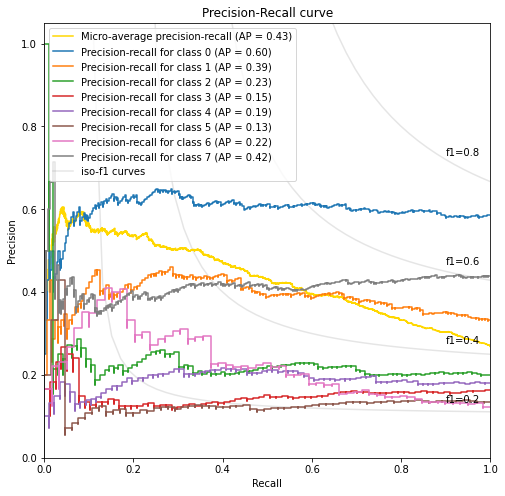

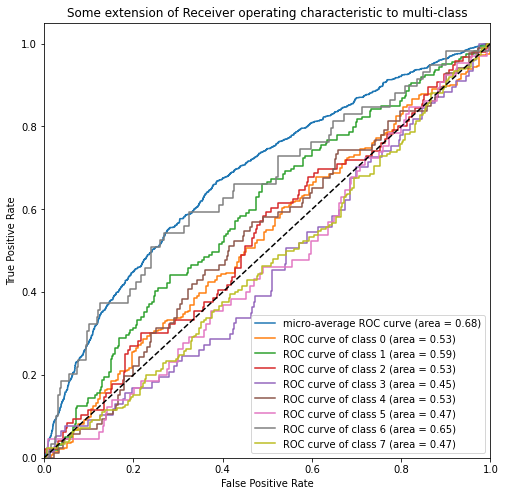

In [73]:
plot_pr_curve(test_labels, predicted_labels_lp.toarray())
plot_roc_curve(test_labels, predicted_labels_lp.toarray())